In [1]:
from tftb.generators import fmlin
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft
from functions import *

In [2]:
# Sample rate and duration of the signal
sample_rate = 1000  # Hz
duration = 3.0  # seconds
num_samples = int(sample_rate * duration)

# Create a time vector
t = np.linspace(0, duration, num_samples, endpoint=False)

# Create your signal with three components (5 Hz, 12 Hz, 15 Hz)
component_1 = np.sin(2 * np.pi * 5 * time)
component_2 = np.sin(2 * np.pi * 12 * time)
component_3 = np.sin(2 * np.pi * 15 * time)
signal = component_1 + component_2 + component_3

In [3]:
offset = 2
signal_o = signal + offset

mean = 0
std = 3
white_noise = np.random.normal(mean, std, size=(num_samples,))

signal_wn = signal + white_noise

fmin, fmax = 0.0, 0.05
lin_var_freq_comp, _ = fmlin(num_samples, fmin, fmax)
lin_var_freq_comp = np.real(lin_var_freq_comp)
signal_lfq = signal + lin_var_freq_comp

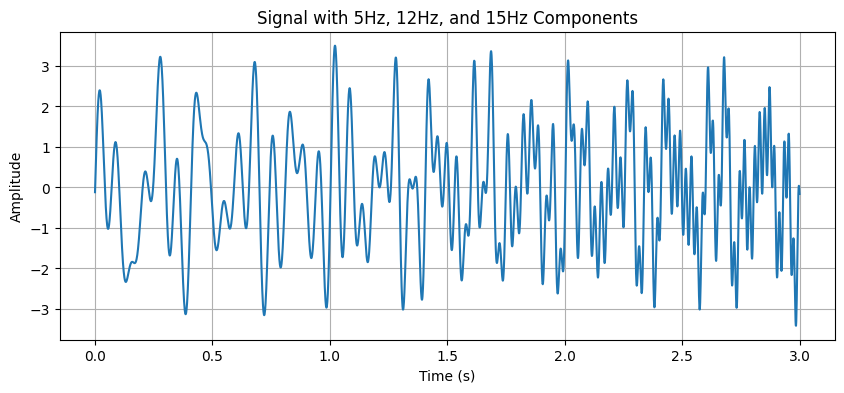

In [4]:
# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal_lfq)
plt.title('Signal with 5Hz, 12Hz, and 15Hz Components')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [5]:
f, t, Sxx = stft(signal=signal_lfq, window_size=500, overlap=250)